In [286]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from collections import Counter

# Data explorations

In [2]:
df = pd.read_csv('film.csv', sep='\t')
df

,id,name,overview,certificate,runtime,nvote,imdb_rate,director,cast,genre,keyword,release_date,country,language,location,company,budget,gross
0,tt1375666,Kẻ Đánh Cắp Giấc Mơ,A thief who steals corporate secrets through t...,PG-13,148.0,2356036,8.8,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...","Action, Adventure, Sci-Fi, Thriller","dream,ambiguous ending,subconscious,mindbender...","August 6, 2010 (Vietnam)","United States, United Kingdom","English, Japanese, French","Fortress Mountain, Kananaskis Country, Alberta...","Warner Bros., Legendary Entertainment, Syncopy","$160,000,000","$836,848,102"
1,tt0816692,Hố Đen Tử Thần,A team of explorers travel through a wormhole ...,C13,169.0,1835446,8.6,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...","Adventure, Drama, Sci-Fi","astronaut,saving the world,space travel,wormho...","November 7, 2014 (Vietnam)","United States, United Kingdom, Canada",English,Iceland,"Paramount Pictures, Warner Bros., Legendary En...","$165,000,000","$773,867,216"
2,tt1345836,Kỵ Sĩ Bóng Đêm Trỗi Dậy,Eight years after the Joker's reign of anarchy...,PG-13,164.0,1707832,8.4,Christopher Nolan,"Christian Bale, Tom Hardy, Anne Hathaway, Gary...","Action, Drama","dc comics,batman character,bruce wayne charact...","July 27, 2012 (Vietnam)","United States, United Kingdom","English, Arabic","Mehrangarh Fort, Jodhpur, Rajasthan, India","Warner Bros., Legendary Entertainment, DC Ente...","$250,000,000","$1,081,169,825"
3,tt1853728,Hành Trình Django,"With the help of a German bounty-hunter, a fre...",R,165.0,1557694,8.4,Quentin Tarantino,"Jamie Foxx, Christoph Waltz, Leonardo DiCaprio...","Drama, Western","slavery,racial vengeance,racial violence,ku kl...","March 15, 2013 (Vietnam)",United States,"English, German, French, Italian","Evergreen Plantation, 4677 Highway 18, Edgard,...","The Weinstein Company, Columbia Pictures","$100,000,000","$426,074,373"
4,tt0993846,Sói Già Phố Wall,"Based on the true story of Jordan Belfort, fro...",R,180.0,1414845,8.2,Martin Scorsese,"Leonardo DiCaprio, Jonah Hill, Margot Robbie, ...","Biography, Comedy, Crime, Drama","based on true story,stockbroker,debauchery,ext...","January 11, 2014 (Vietnam)",United States,"English, French","Portofino, Genoa, Liguria, Italy","Red Granite Pictures, Appian Way, Sikelia Prod...","$100,000,000","$406,878,233"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,tt7149730,The Silencing,A reformed hunter living in isolation on a wil...,R,93.0,26264,6.2,Robin Pront,"Nikolaj Coster-Waldau, Caleb Ellsworth-Clark, ...","Action, Crime, Mystery, Thriller","serial killer,dead girl,wildlife sanctuary,she...","July 18, 2020 (United States)","Canada, United States",English,"Sudbury, Ontario, Canada","Anova Pictures, Madrona Drive, Silencing Canad...",NaN,"$170,653"
2246,tt12838766,Con Tàu Chiến Thắng,Set in the year 2092 and follows the crew of a...,C16,136.0,26254,6.5,Sung-hee Jo,"Song Joong-ki, Kim Tae-ri, Jin Seon-kyu, Hae-J...","Action, Adventure, Drama, Fantasy, Sci-Fi","space pirate,android,robot sci fi,adopting a d...","February 5, 2021 (South Korea)",South Korea,"Korean, English, Spanish, Danish, French, Germ...","Seoul, South Korea",Bidangil Pictures,NaN,"$24,571"
2247,tt6432466,Moxie: Nữ Giới Mạnh Mẽ,Inspired by her mom's rebellious past and a co...,PG-13,111.0,26250,6.7,Amy Poehler,"Hadley Robinson, Lauren Tsai, Alycia Pascual-P...","Comedy, Drama, Music","teenager,f rated,feminist,feminist film,bad dream","March 3, 2021 (United States)",United States,English,"Los Angeles, California, USA","Netflix, Paper Kite Productions",NaN,NaN
2248,tt4257926,Miracles from Heaven,Based on the incredible true story of the Beam...,PG,109.0,26229,7.1,Patricia Riggen,"Jennifer Garner, Kylie Rogers, Martin Henderso...","Biography, Drama, Family","christian film,christianity,christian,hospital...","March 16, 2016 (United States)",United States,English,"Atlanta, Georgia, USA","Columbia Pictures, Affirm 

In [3]:
df.shape

(2250, 18)

Dữ liệu có 2250 dòng và 18 cột

#### Các cột là các thuộc tính của một bộ phim

Các cột:
- `id`: id của phim
- `name`: Tên phim
- `overview`: Mô tả tổng quát phim
- `certificate`: Phân loại phim:
                - G, P (General Audiences) – Phim dành cho mọi lứa tuổi
                - PG (Parental Guidance Suggested) – Phim có thể có một số chi tiết (hình ảnh, từ ngữ) không phù hợp với 
                trẻ nhỏ. Bố mẹ cần cân nhắc khi cho con cái xem phim
                - PG-13 (Parents Strongly Cautioned) – Phim có một số chi tiết không phù hợp với trẻ dưới 13 tuổi.
                - R (Restricted) – Thanh thiếu niên dưới 17 tuổi không được xem phim nếu không có sự đồng ý của người lớn.
                - C13 - Phim dành cho người trên 13 tuổi.
                - C16 - Phim dành cho người trên 16 tuổi.
                - C18 - Phim dành cho người trên 18 tuổi.
                - NC17 -(No One 17 and Under Admitted) – Phim hoàn toàn không dành cho khán giả dưới 17 tuổi
                - (Banned) - Phim bị cấm chiếu ở một số nơi.
                - Not Rated, Unrate - Phim không hoặc chưa được đánh giá.
- `runtime`: Thời lượng phim (phút).
- `genre`: Thể loại( Action, Adventure, Animation, Biography, Comedy, Crime, Documentary, Drama, Family, Fantasy, Film Noir, History, Horror, Music Musical, Mystery, Romance, Sci-Fi, Short Film, Sport, Superhero, Thriller, War, Western)
- `keywords`: Các từ khóa liên quan đến phim.
- `imdb_rate`: Số điểm đánh giá từ IMDB
- `nvote`: Số lượt đánh giá
- `director`: danh sách các đạo diễn 
- `Casts`: danh sách các diễn viên nổi bật của phim
- `release_date`: Ngày công chiếu
- `countries`: Country of origin
- `language` : Ngôn ngữ trong phim
- `locations` : Địa điểm quay phim
- `company` : Công ty sản xuất
- `gross`: Doanh thu của phim (M Dollar)


In [4]:
df.sample()

,id,name,overview,certificate,runtime,nvote,imdb_rate,director,cast,genre,keyword,release_date,country,language,location,company,budget,gross
818,tt1007029,Người Đàn Bà Thép,An elderly Margaret Thatcher talks to the imag...,PG-13,105.0,110367,6.4,Phyllida Lloyd,"Meryl Streep, Jim Broadbent, Richard E. Grant,...","Biography, Drama","british female politician,british prime minist...","January 6, 2012 (United Kingdom)","United Kingdom, France",English,"Eaton Square, Belgravia, London, England, UK","DJ Films, Pathé, Film4","$13,000,000","$115,890,699"


Mỗi dòng là thông tin về các thuộc tính của 1 phim

In [5]:
df.index.duplicated(keep='first').sum()

0

Dữ liệu không có dòng bị lặp

#### Kiểu dữ liệu của các cột:

In [6]:
df.dtypes

id               object
name             object
overview         object
certificate      object
runtime         float64
nvote             int64
imdb_rate       float64
director         object
cast             object
genre            object
keyword          object
release_date     object
country          object
language         object
location         object
company          object
budget           object
gross            object
dtype: object

Các cột có type là `object`. Cần tìm type chính xác của các cột này

In [7]:
def open_object_dtype(s):
    dtypes = set()
    dtypes = set(s.apply(type))
    return dtypes

In [8]:

print('id:', open_object_dtype(df['id']))
print('name:', open_object_dtype(df['name']))
print('overview:', open_object_dtype(df['overview']))
print('keyword:', open_object_dtype(df['keyword']))
print('certificate:', open_object_dtype(df['certificate']))
print('genres:', open_object_dtype(df['genre']))
print('director:', open_object_dtype(df['director']))
print('cast:', open_object_dtype(df['cast']))
print('release_date:', open_object_dtype(df['release_date']))
print('country:', open_object_dtype(df['country']))
print('language:', open_object_dtype(df['language']))
print('location:', open_object_dtype(df['location']))
print('company:', open_object_dtype(df['company']))
print('gross:', open_object_dtype(df['gross']))
print('budget:', open_object_dtype(df['budget']))

id: {<class 'str'>}
name: {<class 'str'>}
overview: {<class 'str'>}
keyword: {<class 'str'>, <class 'float'>}
certificate: {<class 'str'>, <class 'float'>}
genres: {<class 'str'>}
director: {<class 'str'>}
cast: {<class 'str'>}
release_date: {<class 'str'>}
country: {<class 'str'>}
language: {<class 'str'>}
location: {<class 'str'>, <class 'float'>}
company: {<class 'str'>, <class 'float'>}
gross: {<class 'str'>, <class 'float'>}
budget: {<class 'str'>, <class 'float'>}


Nhận xét:
- Column `keyword` `tagline` `certificate` `location` có một số giá trị có kiểu `float` do mang giá trị NULL

- Các column `keyword` `genre` `director` `star` `language` `location` `company`  phải là list tuy nhiên đang có type là 'str'

- `release_date` chưa có kiểu dữ liệu là datetime

- `gross` và `budget` cần  có type là float

#### Chỉnh sửa các column về kiểu dữ liệu phù hợp

* Các column dạng list

In [9]:
df['keyword'] = df['keyword'].apply(lambda x: x.split(",") if(type(x) == str) else x)
df['genre'] = df['genre'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['director'] = df['director'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['cast'] = df['cast'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['language'] = df['language'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['location'] = df['location'].apply(lambda x: x.split(", ") if(type(x) == str) else x)
df['company'] = df['company'].apply(lambda x: x.split(", ") if(type(x) == str) else x)

* Column `release_date`

In [10]:
df[['release_date']].sample(n = 5)

,release_date
964,"April 11, 2014 (Vietnam)"
2191,"February 12, 2021 (United States)"
821,"August 17, 2018 (United States)"
700,"April 18, 2014 (Vietnam)"
381,"April 8, 2011 (Vietnam)"


In [11]:
def try_parsing_date(text):
    date = text.split(' (')[0]
    for fmt in ('%B %d, %Y', '%B %Y', '%Y'):
        try:
            return dt.datetime.strptime(date, fmt)
        except ValueError:
            pass
    raise ValueError('no valid date format found' ,date )

In [12]:
df['release_date'] = df['release_date'].apply(lambda x: try_parsing_date(x) if(type(x) == str) else x )

* Thêm column `year` vào dataframe

In [13]:
df['year'] = df['release_date'].apply(lambda x: x.year)

- Chuyển `gross` và `budget` sang kiểu số

In [14]:
df[['gross', 'budget']].sample(20)

,gross,budget
2063,"$16,706,074",NaN
742,"$304,868,961","$125,000,000"
1344,"$108,255,770","$60,000,000"
1044,"$21,107,746","$1,800,000"
2049,"$3,777,046","$8,900,000"
460,"$409,231,607","$125,000,000"
1259,"$39,346,577","₹450,000,000"
699,"$524,580,592","$129,000,000"
584,"$415,686,217","$155,000,000"
418,"$470,116,094","$200,000,000"


In [15]:
def get_unit(money):
    money = money.replace(',', '')
    unit = ''.join(x for x in money if not x.isdigit())
    return unit
def get_number(money):
    money = money.replace(',', '')
    number = ''.join(x for x in money if x.isdigit())
    return float(number)

In [16]:
units = df['gross'].apply(lambda x: get_unit(x) if(type(x) == str) else x).unique()
units

array(['$', nan], dtype=object)

In [17]:
units = df['budget'].apply(lambda x: get_unit(x) if(type(x) == str) else x).unique()
units

array(['$', '€', '£', nan, '¥', '₩', '₹', 'TRL\xa0', 'NOK\xa0', 'A$',
       'CA$', 'DKK\xa0', 'SEK\xa0', 'MVR\xa0', 'NZ$', 'PKR\xa0', 'R$',
       'BDT\xa0'], dtype=object)

`Budget` có nhiều loại tiền khác nhau, cần chuyển sang $.

In [18]:
def to_usd(money):
    unit = get_unit(money)
    number = get_number(money)
    if unit == '$':
        number = number
    elif unit == '€':
        number = number * 1.07
    elif unit == '£':
        number = number * 1.22
    elif unit == '¥':
        number = number * 0.0076
    elif unit == '₩':
        number = number * 0.0008
    elif unit == '₹':
        number = number * 0.012
    elif unit == 'TRL\xa0':
        number = number * 0.053
    elif unit == 'NOK\xa0':
        number = number * 0.1
    elif unit == 'NOK\xa0':
        number = number * 0.1
    elif unit == 'A$':
        number = number * 0.69
    elif unit == 'CA$':
        number = number * 0.75
    elif unit == 'DKK\xa0':
        number = number * 0.14
    elif unit == 'SEK\xa0':
        number = number * 0.096
    elif unit == 'MVR\xa0':
        number = number * 0.065
    elif unit == 'NZ$':
        number = number * 0.64
    elif unit == 'PKR\xa0':
        number = number * 0.0044
    elif unit == 'R$':
        number = number * 0.19
    elif unit == 'BDT\xa0':
        number = number * 0.0095
    return number / 1000000

In [19]:
df['budget'] = df['budget'].apply(lambda x: to_usd(x) if(type(x) == str) else x)

In [20]:
df['gross'] = df['gross'].apply(lambda x: to_usd(x) if(type(x) == str) else x)

### Phân bố của từng column

### - Numeric column

In [21]:
# YOUR CODE HERE
num_col_info_df = df.select_dtypes(exclude='object')
def missing_ratio(s):
    return (s.isna().mean() * 100)

def median(df):
    return (df.quantile(0.5))

def lower_quartile(df):
    return (df.quantile(0.25))

def upper_quartile(df):
    return (df.quantile(0.75))

In [22]:
num_col_info_df = num_col_info_df.agg([missing_ratio , min, lower_quartile, median, upper_quartile, max])

In [23]:
num_col_info_df

,runtime,nvote,imdb_rate,release_date,budget,gross,year
missing_ratio,0.044444,0.00,0.0,0.0,22.00000,7.377778,0.0
min,46.000000,26178.00,1.0,2010-01-08 00:00:00,0.00001,0.000693,2010.0
lower_quartile,98.000000,42945.25,6.1,2013-01-19 18:00:00,10.45000,8.514890,2013.0
median,109.000000,77059.00,6.6,2015-09-21 12:00:00,28.00000,44.111135,2015.0
upper_quartile,123.000000,162205.75,7.2,2018-08-17 00:00:00,62.50000,149.495924,2018.0
max,321.000000,2356036.00,9.0,2022-10-21 00:00:00,356.00000,2797.501328,2022.0


### - Categorical column

In [24]:
def get_cate_col_profiles(df, cate_col):
    missing_ratio = []
    num_diff_vals = []
    diff_vals = []
    for col in cate_col:
        column = df[col].dropna()
        missing_ratio.append( 100 - len(column) / 2250 * 100)
        diff_val = column.to_list()
        if type(column[0]) == list:
            diff_val = pd.Series(sum(diff_val, [])).unique()
        else:
            diff_val = pd.Series(diff_val).unique()
        num_diff_vals.append(len(diff_val))
        diff_vals.append(diff_val)
    profile = pd.DataFrame(([ missing_ratio, num_diff_vals, diff_vals]), columns = cate_col)
    
    index = pd.Series(["missing_ratio%", "num_diff_vals", "diff_vals"])
    profile['Value'] = index
    profile = pd.DataFrame(profile.set_index('Value'))
    
    return profile
cate_col = ['id', 'name', 'overview', 'certificate',  'director', 'cast', 'genre', 'keyword',
             'country', 'language', 'location', 'company' ]
cate_col_profiles_df = get_cate_col_profiles(df, cate_col)
cate_col_profiles_df

,id,name,overview,certificate,director,cast,genre,keyword,country,language,location,company
Value,,,,,,,,,,,,
missing_ratio%,0.0,0.0,0.0,13.955556,0.0,0.0,0.0,0.088889,0.0,0.0,5.644444,0.088889
num_diff_vals,2250,2242,2250,12,1409,4013,20,5455,477,137,2061,2289
diff_vals,"[tt1375666, tt0816692, tt1345836, tt1853728, t...","[Kẻ Đánh Cắp Giấc Mơ, Hố Đen Tử Thần, Kỵ Sĩ Bó...",[A thief who steals corporate secrets through ...,"[PG-13, C13, R, P, C18, C16, (Banned), PG, G, ...","[Christopher Nolan, Quentin Tarantino, Martin ...","[Leonardo DiCaprio, Joseph Gordon-Levitt, Elli...","[Action, Adventure, Sci-Fi, Thriller, Drama, W...","[dream, ambiguous ending, subconscious, mindbe...","[United States, United Kingdom, United States,...","[English, Japanese, French, Arabic, German, It...","[Fortress Mountain, Kananaskis Country, Albert...","[Warner Bros., Legendary Entertainment, Syncop..."


`certificate` ta sẽ thay thế các giá trị bị thiếu thành `Unrate`

In [25]:
df['certificate'] = df['certificate'].fillna('Unrate')

Ta sẽ xóa đi các dòng chứa missing_value

In [26]:
df = df[df.isnull().sum(axis=1) < 1]

In [27]:
df.shape

(1640, 19)

# 2. Đặt câu hỏi:

### 2.5. Tháng nào có số lượng phim phát hành nhiều nhất, tháng nào có doanh thu trung bình cao nhất? So sánh doanh thu trung bình của phim ra mắt trong `mùa phim` và phim ra mắt vào các tháng khác.

Ta xem sơ qua dữ liệu của cột `release_date`

In [28]:
df.release_date.head(10)

0   2010-08-06
1   2014-11-07
2   2012-07-27
3   2013-03-15
4   2014-01-11
5   2012-04-27
6   2010-04-02
7   2019-10-04
8   2014-08-01
9   2019-04-26
Name: release_date, dtype: datetime64[ns]

Sau đó, trích thông tin tháng phát hành phim ra:

In [95]:
month_release = df.release_date.dt.month

Đếm số lượng phim được phát hành trong từng tháng

In [96]:
number_of_release = month_release.value_counts().sort_index()
months=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
number_of_release = pd.DataFrame(number_of_release)
number_of_release['month'] = months
number_of_release.rename(columns = {'release_date':'number_of_release'},inplace=True)

Xem biểu đồ số lượng phim được phát hành trong các tháng để tìm `mùa phim`

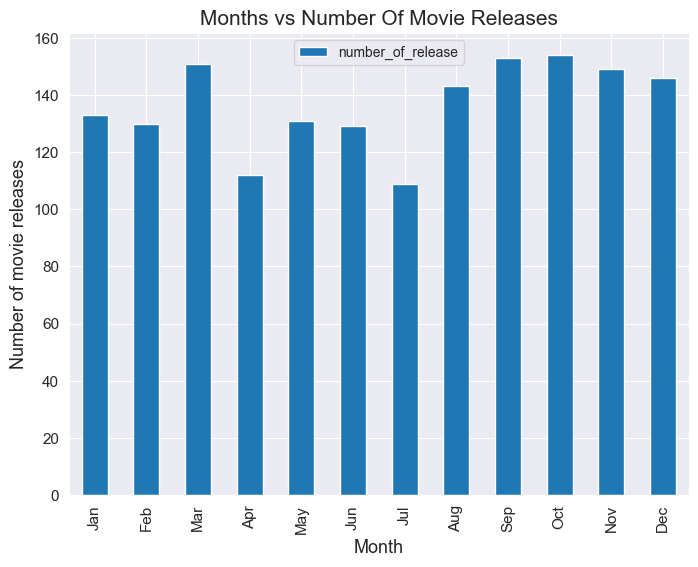

In [97]:
number_of_release.plot(x='month',kind='bar',fontsize = 11,figsize=(8,6))
plt.title('Months vs Number Of Movie Releases',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Number of movie releases',fontsize = 13)
sns.set_style("darkgrid")

Từ biểu đồ này, ta thấy được dịp `cuối năm` - tức từ `tháng 9 đến tháng 12` thì số lượng phim được phát hành là nhiều và đồng đều nhất, `tháng 3` tuy cũng có số lượng phim nhiều tuy nhiên các tháng kế thì không có sự tương đồng. Vậy, `quý cuối năm` sẽ là `mùa phim`.

In [109]:
# Xem tháng min-max
print(df.release_date.min(), df.release_date.max())

2010-01-08 00:00:00 2022-06-24 00:00:00


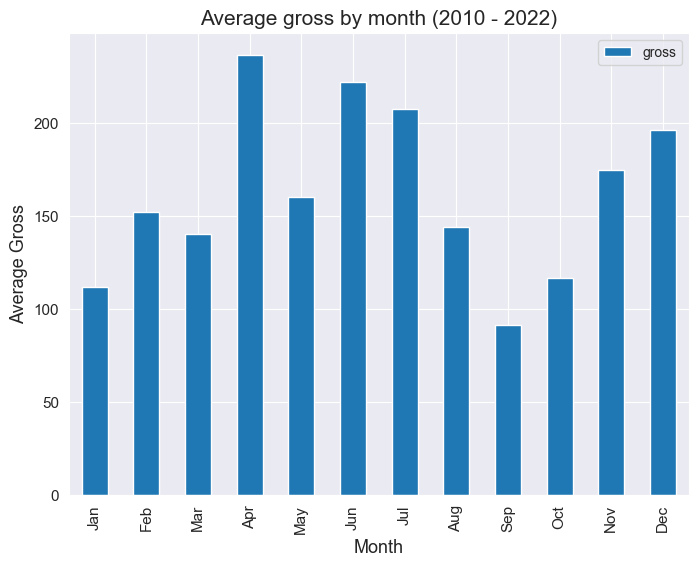

In [113]:
month_release = pd.DataFrame(month_release)
month_release.rename(columns = {'release_date':'release_month'},inplace=True)
month_release['gross'] = df['gross']

mean_gross  = month_release.groupby('release_month').mean()
mean_gross['month'] = months

mean_gross.plot(x='month',kind='bar',figsize = (8,6),fontsize=11)

plt.title('Average gross by month (2010 - 2022)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Gross',fontsize = 13)
sns.set_style("darkgrid")

Qua kết quả ở trên, `tháng 4` là tháng có doanh thu trung bình cao nhất. Tuy nhiên, tháng 4 lại `không nằm trong mùa phim`.

Thú vị hơn nữa, `tháng 4 và tháng 7` tuy có số lượng phim ra mắt thấp nhất nhưng lại đem về doanh thu thuộc hàng cao nhất trong các tháng.

Có thể thấy, phim được ra mắt trong `mùa phim` có vẻ khó đem lại lợi nhuận hơn khi mà có rất nhiều phim cạnh tranh ra mắt cùng lúc? Nếu có dịp chúng ta sẽ đào sâu hơn về vấn đề này.

### 2.6. Phim được gán nhãn nào thu hút nhiều lượt đánh giá nhất? Phim chứa nhãn thu hút nhất thuộc thể loại gì và nên được phát hành vào tháng nào trong năm?

Đầu tiên, ta xem số lượt đánh giá cho từng nhãn phim và điểm trung bình của chúng:

In [172]:
votes_per_cert = pd.DataFrame(df.groupby('certificate')['nvote'].sum())
votes_per_cert['imdb_rate'] = df.groupby('certificate')['imdb_rate'].mean()
votes_per_cert = votes_per_cert.sort_values(by=['nvote'], ascending=False).reset_index()
votes_per_cert

,certificate,nvote,imdb_rate
0,R,90759818,6.536950
1,PG-13,59963315,6.503090
2,C16,38362107,6.435976
3,C13,38130237,6.676316
4,C18,22506977,6.670707
5,P,18355894,6.775325
6,PG,7923468,6.493333
7,Unrate,5375339,6.855882
8,(Banned),1748424,5.645455
9,G,685569,6.000000


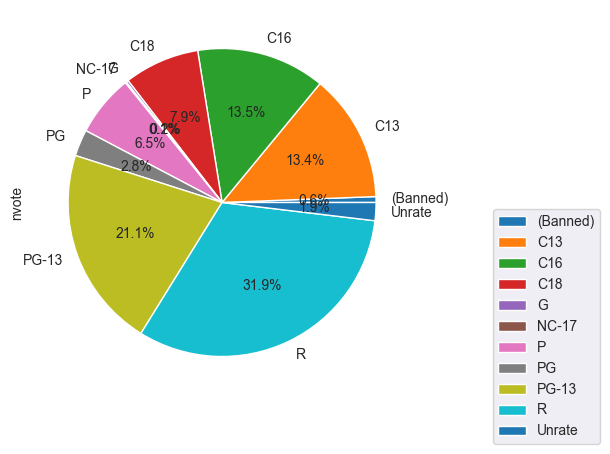

In [215]:
votes_per_cert.groupby(['certificate']).sum().plot(kind='pie', y='nvote', figsize=(5,5), autopct='%1.1f%%').legend(loc='best', bbox_to_anchor=(1, 0., 0.5, 0.5));

Ta thấy, `nhãn R (Restricted) – Thanh thiếu niên dưới 17 tuổi không được xem phim nếu không có sự đồng ý của người lớn.` thu hút mọi người đánh giá nhiều nhất. Thậm chí nhãn này còn bỏ xa nhãn đứng thứ 2 là PG-13 đến hơn 10% (gần 30 triệu lượt đánh giá). Đều này cho thấy mọi người có hứng thú hơn hết với các bộ phim được gán nhãn R.

**Chúng ta hãy cùng tìm hiểu xem phim có chứa nhãn R nên được phát hành vào tháng nào**

Đầu tiên, ta sẽ lấy các dữ liệu cần thiết:
* Tên phim
* Tháng phát hành
* Doanh thu

In [271]:
R_release = pd.DataFrame(df.loc[df['certificate'] == 'R', 'name'])
R_release['release_month'] = df.loc[df['certificate'] == 'R', 'release_date'].dt.month
R_release['gross'] = df.loc[df['certificate'] == 'R', 'gross']
R_release['genre'] = df.loc[df['certificate'] == 'R', 'genre']
R_release = R_release.sort_values(by=['release_month'], ascending=True)
R_release

,name,release_month,gross,genre
502,Tìm Tung Tích Mẹ,1,6.788659,"[Drama, Mystery]"
1468,Texas Chainsaw 3D,1,47.340586,"[Horror, Thriller]"
846,The Little Things,1,30.842746,"[Crime, Drama, Mystery, Thriller]"
1712,Trò Chơi Tình Ái,1,14.454622,"[Drama, Mystery, Thriller]"
1710,Diêm Sinh,1,2.140941,"[Drama, Mystery, Thriller, Western]"
...,...,...,...,...
1736,Hundraåringen som klev ut genom fönstret och f...,12,51.167572,"[Adventure, Comedy]"
1031,Tuổi Mới Lớn,12,22.939027,"[Comedy, Drama]"
1425,Vùng Đất Quỷ Dữ: Quỷ Dữ Trỗi Dậy,12,41.914915,"[Action, Horror, Sci-Fi]"
157,Đại Suy Thoái,12,133.440870,"[Biography, Comedy, Drama, History]"


Ta tìm xem tổng số lượng phim được phát hành theo từng tháng

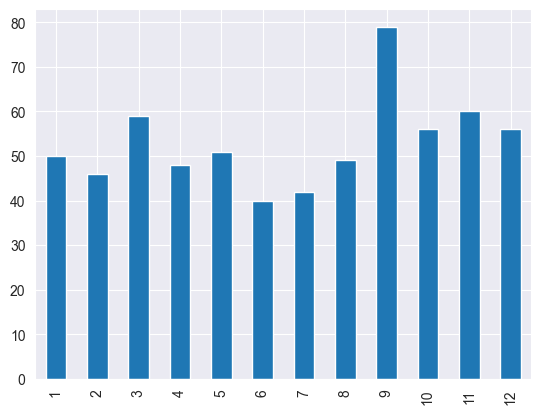

In [272]:
R_release['release_month'].value_counts(sort=False).plot.bar();

Từ đây ta thấy được, phim nhãn R thường được phát hành vào tháng 9.

Tiếp theo, ta tìm trung bình doanh thu theo tháng của các bộ phim nhãn R

In [273]:
R_mean_gross  = R_release.groupby('release_month').mean().reset_index()
R_mean_gross

,release_month,gross
0,1,67.323164
1,2,112.349335
2,3,62.020691
3,4,48.112463
4,5,74.608391
5,6,63.600843
6,7,51.827164
7,8,68.434162
8,9,72.455000
9,10,51.412740


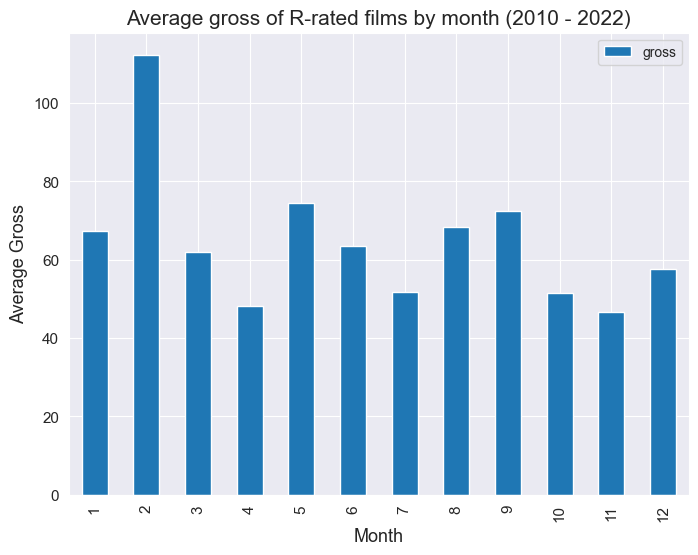

In [274]:
R_mean_gross.plot(x='release_month',kind='bar',figsize = (8,6),fontsize=11)

plt.title('Average gross of R-rated films by month (2010 - 2022)',fontsize = 15)
plt.xlabel('Month',fontsize = 13)
plt.ylabel('Average Gross',fontsize = 13)
sns.set_style("darkgrid")

Trái ngược với số lượng phim được phát hành áp đảo của tháng 9, tháng 2 có ít phim được phát hành nhưng lại đem lại lợi nhuận cao hơn hẳn so với các tháng khác trong năm. Phải chăng là vì các bộ phim được phát hành vào dịp Valentine - Ngày lễ tình yêu?

Để kiểm chứng điều này, ta sẽ cùng khám phá xem thể loại phim nào được gán nhãn R và phát hành vào tháng 2 nhiều nhất. (Một bộ phim có thể có nhiều thể loại)

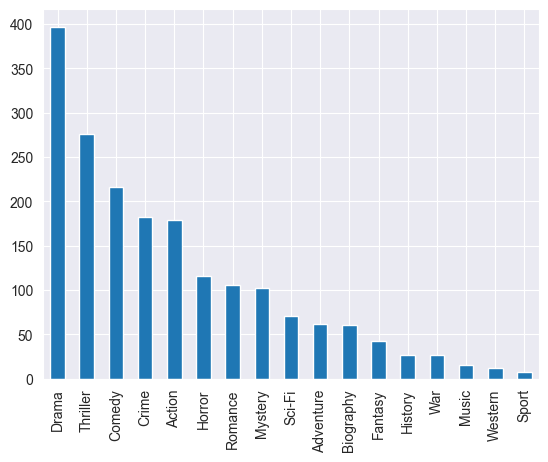

In [303]:
R_release["genre"].explode().value_counts().plot(kind='bar');

Phim thuộc thể loại `Drama` có số lượng cao nhất, rất phù hợp cho thị hiếu của tháng 2.

Ta có thể thấy, phim được gán nhãn R muốn đạt doanh thu cao và thu hút nhiều sự chú ý thì nên thuộc thể loại `Drama` và phát hành vào `tháng 2`